# Проект
## Использование модели линейной регрессии

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Чтение, анализ, чистка датасета (EDA)

In [98]:
# читаем датасет
df = pd.read_csv('GB_dataset.csv')
df.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
0,4358a11f0d16be6e,0,0,1,2021-12-01,https://gb.ru/education,https://gb.ru/comms/calendar,NaN,NaN,0,39,1,1,0
1,133509b7ff9a586c,0,0,0,2021-12-01,https://www.google.com/,https://gb.ru/courses/programming,google,cpc,-1,-1,2,0,0
2,8b23cd36f2b08dcd,0,0,0,2021-12-01,https://gb.ru/tests/352/trials/2238911/run,https://gb.ru/tests/352/trials/2238911,NaN,NaN,1,49,1,1,1
3,50de4c060fd128f3,0,1,1,2021-12-01,https://gb.ru/courses/1165,https://gb.ru/a/a1,NaN,NaN,-1,-1,1,1,0
4,c2ca3cc9a67c749b,0,0,0,2021-12-01,NaN,https://gb.ru/login,NaN,NaN,0,23,2,1,0


In [99]:
# читаем описание датасета
pd.set_option('display.max_colwidth', None)
descr = pd.read_excel('Описание датасета.xlsx')
descr

,Поле,Описание
0,session_id,идентификатор сессии
1,claim,"признак наличия отправки формы заявки во вемя текущей сессии (0 – нет заявки, 1 – заявка отправлена)"
2,60sec,"признак длительности сессии 60 секунд и более (0 – сессия менее 60 сек, 1 – сессия 60 сек и более)"
3,scroll_90,"признак вертикальной прокрутки страницы глубиной 90% (0 – прокрутка менее 90%, 1 – прокрутка 90% и более)"
4,hit_date,дата сессии
5,referer_url,адрес реферера страницы просмотра
6,url,адрес страницы просмотра
7,utm_source,utm-метка источника
8,utm_medium,utm-метка канала
9,gender,"пол посетителя из куки (-1 – не определен, 0 – мужской, 1 – женский)"


In [100]:
# характеристики датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884407 entries, 0 to 884406
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   session_id    884407 non-null  object
 1   claim         884407 non-null  int64 
 2   60sec         884407 non-null  int64 
 3   scroll_90     884407 non-null  int64 
 4   hit_date      884407 non-null  object
 5   referer_url   687598 non-null  object
 6   url           884407 non-null  object
 7   utm_source    245184 non-null  object
 8   utm_medium    244863 non-null  object
 9   gender        884407 non-null  int64 
 10  age           884407 non-null  int64 
 11  touch_screen  884407 non-null  int64 
 12  has_vk_id     884407 non-null  int64 
 13  has_ok_id     884407 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 94.5+ MB


In [101]:
# статистики числовых признаков
df.describe()

,claim,60sec,scroll_90,gender,age,touch_screen,has_vk_id,has_ok_id
count,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000
mean,0.002071,0.313425,0.144197,-0.359456,14.844552,1.436307,0.449500,0.124044
std,0.045466,0.463886,0.351290,0.808853,21.505421,0.495927,0.497444,0.329631
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,29.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,2.000000,1.000000,1.000000


In [102]:
# временной ряд собранных данных
df['hit_date'].unique().tolist()

['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04']

In [103]:
# возрастной состав 
df['age'].sort_values().unique().tolist()[0:20]

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

<AxesSubplot:xlabel='age', ylabel='Density'>

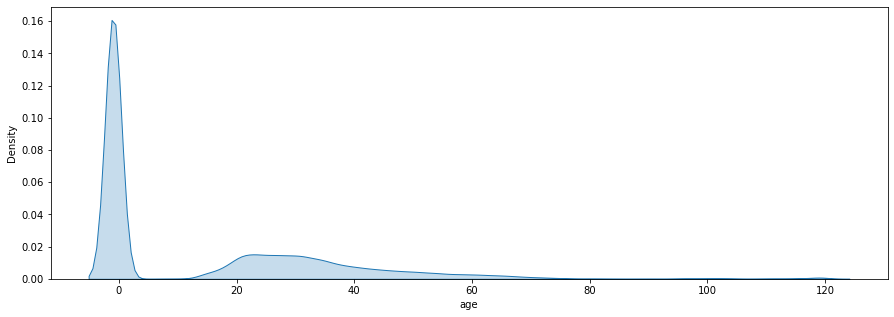

In [104]:
# посмотрим распределение посетилетей сайта по возратному составу и полу
plt.figure(figsize=(15, 5))
sns.kdeplot(df['age'], shade=True)

In [105]:
# удаляем выбросы по признаку возрастного состава
df = df.loc[df['age']<80]
df = df.loc[df['age']>10]
# удаляем строки, в которых не идентифицирован пол
df = df.loc[df['gender']!=-1]
df.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
0,4358a11f0d16be6e,0,0,1,2021-12-01,https://gb.ru/education,https://gb.ru/comms/calendar,NaN,NaN,0,39,1,1,0
2,8b23cd36f2b08dcd,0,0,0,2021-12-01,https://gb.ru/tests/352/trials/2238911/run,https://gb.ru/tests/352/trials/2238911,NaN,NaN,1,49,1,1,1
4,c2ca3cc9a67c749b,0,0,0,2021-12-01,NaN,https://gb.ru/login,NaN,NaN,0,23,2,1,0
5,f8e5a48beec53c84,0,1,1,2021-12-01,https://gb.ru/courses,https://gb.ru/courses/1161,NaN,NaN,1,68,1,1,1
7,7e8f116543ae2ac3,0,0,0,2021-12-01,https://gb.ru/tests/348/trials/2241344,https://gb.ru/tests,NaN,NaN,1,46,1,1,1


In [106]:
# удаляем столбцы с типом данных "object"
df = df.drop(['session_id', 'hit_date', 'referer_url', 'url', 'utm_source', 'utm_medium'], axis=1)
df.head()

,claim,60sec,scroll_90,gender,age,touch_screen,has_vk_id,has_ok_id
0,0,0,1,0,39,1,1,0
2,0,0,0,1,49,1,1,1
4,0,0,0,0,23,2,1,0
5,0,1,1,1,68,1,1,1
7,0,0,0,1,46,1,1,1


In [107]:
df.groupby('gender').count()

,claim,60sec,scroll_90,age,touch_screen,has_vk_id,has_ok_id
gender,,,,,,,
0,185864,185864,185864,185864,185864,185864,185864
1,183389,183389,183389,183389,183389,183389,183389


C:\Users\Nina\AppData\Local\Temp\ipykernel_6820\2497094793.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cor_matrix_mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

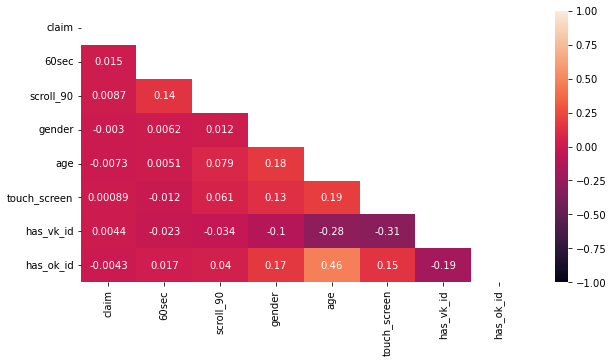

In [108]:
# матрица корреляций
cor_matrix_mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=cor_matrix_mask, annot=True)

### Выводы: 
- часть признаков выражены числом, но по смыслу являются категориальными данными
- в датасете есть пропущенные значения. Они выражены как "неидентифицирован" со значением категориального признака -1
- признак возраста - непрерывная величина , но при этом неидентифицированные значения выражены как категория с признаком "минуc единица"
- нужно почистить датасет: удалены столбцы типа 'object' и строки с неидентифицированными значениями
- в итоге получаем сбалансированный по возрасту и полу датасет.
- возрастной состав теперь похож на нормальное распределение
- линейную регрессию можно применить для прогноза непрерывной величины. В данном дата сете таких две: дата сессии и возраст пользователя. В качестве таргета модели выберем возраст, потому что во-первых, признак сбалансирован и представлен широким диапазоном, во-вторых, в датасете данные собраны за 4 дня, а это слижком малый интервал для прогноза
- признаки не нужно масштабировать, так как все фичи выражены либо единицей, либо двойкой
- матрица корреляций показала слабые линейные зависимости от признаков друг от друга и от таргета. Значит, трудно выделить значимые фичи. Значит, нужно пробовать модели регуляризации регрессии

### Постановка задачи: обучить модель линейной регрессии для предсказания возраста посетителя сайта на основании данных о его поведении на сайте.

### 2. Предобработка данных

In [109]:
#разделение на фичи и таргет
df_target = df['age']
df_features = df.drop(['age'], axis=1)

In [110]:
# разделение на трейн и тест
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

### 3. Обучение моделей

In [111]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
pd.DataFrame(zip(df_features.columns, lin_reg.coef_), columns=['признак', 'вес'])

,признак,вес
0,claim,-2.343053
1,60sec,-0.330168
2,scroll_90,1.983206
3,gender,2.104712
4,touch_screen,1.731688
5,has_vk_id,-7.478413
6,has_ok_id,11.987852


In [112]:
# LASSO-регрессия
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_ls = lasso_reg.predict(X_test)
pd.DataFrame(zip(df_features.columns, lasso_reg.coef_), columns=['признак', 'вес'])

,признак,вес
0,claim,-0.000000
1,60sec,-0.000000
2,scroll_90,1.182545
3,gender,1.827138
4,touch_screen,1.572513
5,has_vk_id,-6.622217
6,has_ok_id,11.697759


In [113]:
# RIDGE-регрессия
from sklearn.linear_model import Ridge
ridge_reg = Ridge(0.5)
ridge_reg.fit(X_train, y_train)
y_pred_rr = ridge_reg.predict(X_test)
pd.DataFrame(zip(df_features.columns, ridge_reg.coef_), columns=['признак', 'вес'])

,признак,вес
0,claim,-2.337864
1,60sec,-0.330163
2,scroll_90,1.983182
3,gender,2.104717
4,touch_screen,1.731711
5,has_vk_id,-7.478292
6,has_ok_id,11.987764


### 4. Оценка моделей

In [114]:
from sklearn.metrics import r2_score
print(f'R2 для линейной регрессии: {r2_score(y_test, y_pred_lr)}')
print(f'R2 для LASSO-регрессии: {r2_score(y_test, y_pred_ls)}')
print(f'R2 для RIDGE-регрессии: {r2_score(y_test, y_pred_rr)}')

R2 для линейной регрессии: 0.2682588194188681
R2 для LASSO-регрессии: 0.26627811058192985
R2 для RIDGE-регрессии: 0.2682587930405713


### Вывод:
Наилучшее значение метрики получилось у модели обычной линейной регресии.
В целом, все три модели линейной регрессии не подходят для предсказания таргета, так как у всех трех моделей получились низкие значения метрики